# Image Retrieval Based on Multi-Texton Histogram

In [124]:
# importing libraries
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

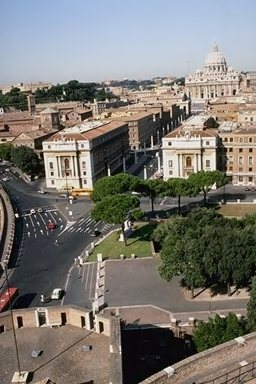

In [125]:
from IPython.display import Image
img = cv2.imread('226.jpg')
width, height, channels = img.shape
Image('226.jpg')

# Texture Orientation Detection

In [126]:
CSA = 64
CSB = 18
arr = np.zeros(3*width*height).reshape(width,height,3)
ori = np.zeros(width * height).reshape(width, height)
ori

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [127]:
gxx = gyy = gxy = 0.0
rh = gh = bh = 0.0
rv = gv = bv = 0.0
theta = 0.0

for i in range(1, width-2):
    for j in range(1, height-2):
        rh=arr[i-1,j+1,0] + 2*arr[i,j + 1,0] + arr[i+1, j+1,0] - (arr[i-1, j - 1, 0] + 2 * arr[i,j-1, 0] + arr[i + 1, j - 1, 0])
        gh=arr[i-1,j+1,1] + 2*arr[i,j + 1,1] + arr[i+ 1,j+1,1] - (arr[i-1, j - 1, 1] + 2 * arr[i,j-1, 1] + arr[i + 1, j - 1, 1])
        bh=arr[i-1,j+1,2] + 2*arr[i,j + 1,2] + arr[i+ 1,j+1,2] - (arr[i-1, j - 1, 2] + 2 * arr[i,j-1, 2] + arr[i + 1, j - 1, 2])
        rv=arr[i+1,j-1,0] + 2*arr[i+1, j, 0] + arr[i+ 1,j+1,0] - (arr[i-1, j - 1, 0] + 2 * arr[i-1,j, 0] + arr[i - 1, j + 1, 0])
        gv=arr[i+1,j-1,1] + 2*arr[i+1, j, 1] + arr[i+ 1,j+1,1] - (arr[i-1, j - 1, 1] + 2 * arr[i-1,j, 1] + arr[i - 1, j + 1, 1])
        bv=arr[i+1,j-1,2] + 2*arr[i+1, j, 2] + arr[i+ 1,j+1,2] - (arr[i-1, j - 1, 2] + 2 * arr[i-1,j, 2] + arr[i - 1, j + 1, 2])
        
        gxx = math.sqrt(rh * rh + gh * gh + bh * bh)
        gyy = math.sqrt(rv * rv + gv * gv + bv * bv)
        gxy = rh * rv + gh * gv + bh * bv
        
        theta = (math.acos(gxy / (gxx * gyy + 0.0001))*180 / math.pi)

ImageX = np.zeros(width * height).reshape(width, height)

# Color Quantization in RGB Color Space

In [128]:
R = G = B = 0
VI = SI = HI = 0
for i in range(0, width-1):
    for j in range(0, height-1):
        R = img[i,j][0]
        G = img[i,j][1]
        B = img[i,j][2]
        
        if (R >=0 and R <= 64):
            VI = 0;
        if (R >= 65 and R <= 128):
            VI = 1;
        if (R >= 129 and R <= 192):
            VI = 2;
        if (R >= 193 and R <= 255):
            VI = 3;
        if (G>= 0 and G <= 64):
            SI = 0;
        if (G >= 65 and G <= 128):
            SI = 1;
        if (G >= 129 and G <= 192):
            SI = 2;
        if (G >= 193 and G <= 255):
            SI = 3;
        if (B >= 0 and B <= 64):
            HI = 0;
        if (B >= 65 and B <= 128):
            HI = 1;
        if (B >= 129 and B <= 192):
            HI = 2;
        if (B >= 193 and B <= 255):
            HI = 3;
        
        ImageX[i, j] = 16 * VI + 4 * SI + HI;

In [129]:
for i in range(0, width-1):
    for j in range(0, height-1):
        ori[i,j] = int(round(theta*CSB/180));
        
        if(ori[i,j]>=CSB-1):
            ori[i,j]=CSB-1;

# Texton Detection

In [130]:
Texton = np.zeros(width * height).reshape(width, height)

for i in range(0,(int)(width/2)-1):
    for j in range(0,(int)(height/2)-1):
        if(ImageX[2*i,2*j] == ImageX[2*i+1,2*j+1]):
            Texton[2 * i, 2 * j] = ImageX[2 * i, 2 * j];
            Texton[2 * i + 1, 2 * j] = ImageX[2 * i + 1, 2 * j];
            Texton[2 * i, 2 * j + 1] = ImageX[2 * i, 2 * j + 1];
            Texton[2 * i + 1, 2 * j + 1] = ImageX[2 * i + 1, 2 * j + 1];
        
        if (ImageX[2*i,2*j+1] == ImageX[2*i+1,2*j]):
            Texton[2 * i, 2 * j] = ImageX[2 * i, 2 * j];
            Texton[2 * i + 1, 2 * j] = ImageX[2 * i + 1, 2 * j];
            Texton[2 * i, 2 * j + 1] = ImageX[2 * i, 2 * j + 1];
            Texton[2 * i + 1, 2 * j + 1] = ImageX[2 * i + 1, 2 * j + 1];
        
        if (ImageX[2*i,2*j] == ImageX[2*i+1,2*j]): 
            Texton[2 * i, 2 * j] = ImageX[2 * i, 2 * j];
            Texton[2 * i + 1, 2 * j] = ImageX[2 * i + 1, 2 * j];
            Texton[2 * i, 2 * j + 1] = ImageX[2 * i, 2 * j + 1];
            Texton[2 * i + 1, 2 * j + 1] = ImageX[2 * i + 1, 2 * j + 1];
            
        if (ImageX[2*i,2*j] == ImageX[2*i,2*j+1]):
            Texton[2 * i, 2 * j] = ImageX[2 * i, 2 * j];
            Texton[2 * i + 1, 2 * j] = ImageX[2 * i + 1, 2 * j];
            Texton[2 * i, 2 * j + 1] = ImageX[2 * i, 2 * j + 1];
            Texton[2 * i + 1, 2 * j + 1] = ImageX[2 * i + 1, 2 * j + 1];                   

# Multi-Texton Histogram

In [140]:
MatrixH = np.zeros(CSA + CSB).reshape(CSA + CSB)
MatrixV = np.zeros(CSA + CSB).reshape(CSA + CSB)
MatrixRD = np.zeros(CSA + CSB).reshape(CSA + CSB)
MatrixLD = np.zeros(CSA + CSB).reshape(CSA + CSB)

D = 1 #distance parameter

for i in range(0, width-1):
    for j in range(0, height-D-1):
        if(ori[i, j+D] == ori[i, j]):
            MatrixH[(int)(Texton[i,j])] += 1;
        if(Texton[i, j + D] == Texton[i, j]):
            MatrixH[(int)(CSA + ori[i, j])] += 1;

for i in range(0, width-D-1):
    for j in range(0, height-1):
        if(ori[i + D, j] == ori[i, j]):
            MatrixV[(int)(Texton[i,j])] += 1;
        if(Texton[i + D, j] == Texton[i, j]):
            MatrixV[(int)(CSA + ori[i, j])] += 1;

for i in range(0, width-D-1):
    for j in range(0, height-D-1):
        if(ori[i + D, j + D] == ori[i, j]):
            MatrixRD[(int)(Texton[i,j])] += 1;
        if(Texton[i + D, j + D] == Texton[i, j]):
            MatrixRD[(int)(CSA + ori[i, j])] += 1;
            
for i in range(D, width-1):
    for j in range(0, height-D-1):
        if(ori[i - D, j + D] == ori[i, j]):
            MatrixLD[(int)(Texton[i,j])] += 1;
        if(Texton[i - D, j + D] == Texton[i, j]):
            MatrixLD[(int)(CSA + ori[i, j])] += 1;

# Feature Vectors

In [142]:
MTH = np.zeros(CSA + CSB).reshape(CSA + CSB)

for i in range(0, CSA + CSB - 1):
    MTH[i] = (MatrixH[i] + MatrixV[i] + MatrixRD[i] + MatrixLD[i])/4.0;

MTH

array([  3.19745000e+04,   6.80000000e+02,   1.00000000e+00,
         0.00000000e+00,   1.75500000e+03,   3.27100000e+03,
         1.60000000e+01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.73000000e+02,   3.60000000e+01,
         0.00000000e+00,   0.00000000e+00,   3.03000000e+02,
         1.47460000e+04,   6.63700000e+03,   2.00000000e+00,
         0.00000000e+00,   7.30000000e+01,   4.70900000e+03,
         6.50000000e+01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   7.00000000e+00,   3.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   5.00000000e+00,
         5.88800000e+03,   2.60200000e+03,   0.00000000e+00,
         0.00000000e+00,   8.00000000e+00,   1.50800000e+03,
         0.00000000e+00,